## Quantum Teleportation
Quantum teleportation is a process by which the quantum state of a particle (e.g., a qubit) is transferred from one location to another without physically moving the particle itself. This process relies on the phenomenon of quantum entanglement and classical communication, and it is a fundamental protocol in quantum information science.

In [3]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.4 MB/s eta 0:00:00


In [4]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 19.2 MB/s eta 0:00:00


In [5]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=106b1a5ae64666a0238efeaae6f94bbaa6251221f05f8841ead8ce923891b637
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [7]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [8]:
# Create a Quantum Circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)

# Step 1: Create an entangled pair between qubit 1 and qubit 2
qc.h(1)
qc.cx(1, 2)

# Step 2: Prepare qubit 0 in the state to be teleported
qc.x(0)

# Step 3: Perform Bell measurement on qubit 0 and qubit 1
qc.cx(0, 1)
qc.h(0)
qc.measure([0, 1], [0, 1])

# Step 4: Apply conditional operations based on the measurement outcomes
qc.cx(1, 2)
qc.cz(0, 2)

# Measure the teleported qubit
qc.measure(2, 2)

# Use the Qiskit Aer simulator to run the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

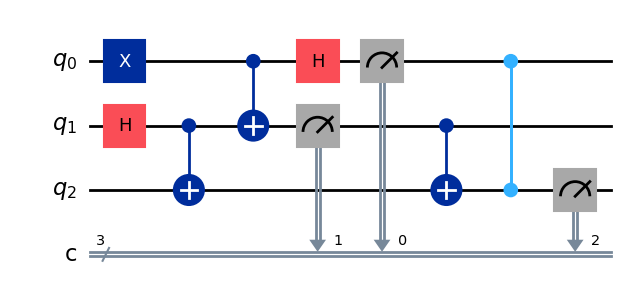

In [9]:
# Draw the circuit
qc.draw('mpl')

Counts: {'101': 243, '110': 248, '100': 252, '111': 281}


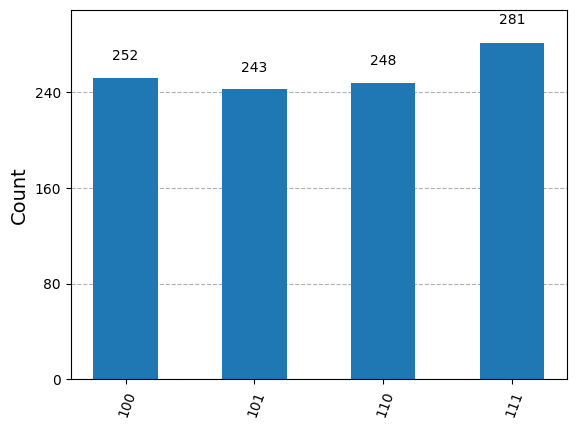

In [10]:
# Get the counts of outcomes
counts = result.get_counts()
print("Counts:", counts)

# Visualize the results
plot_histogram(counts)